# 판다스 내장 그래프 도구 활용
## 1. 선그래프

       1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  ...  2007  \
South  1186  1310  1444  1650  1847  2055  2244  2153  2393  2664  ...  4031   
North   263   247   221   231   230   213   193   170   186   194  ...   236   

       2008  2009  2010  2011  2012  2013  2014  2015  2016  
South  4224  4336  4747  4969  5096  5171  5220  5281  5404  
North   255   235   237   211   215   221   216   190   239  

[2 rows x 26 columns]




<AxesSubplot:>

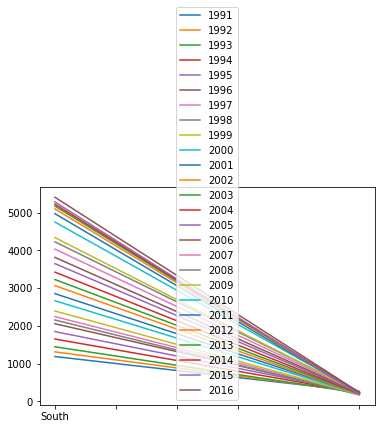

In [5]:
import pandas as pd

df = pd.read_excel('C:\\Users\\Owner\\Desktop\\khh\\SeoulICT\\220212\\남북한발전전력량.xlsx')

df_ns = df.iloc[[0,5], 3:]
df_ns.index = ['South', 'North']
df_ns.columns = df_ns.columns.map(int)    # map(int) : 데이터를 정수형 데이터로 변형
print(df_ns.head())
print('\n')

# 선 그래프 그리기
df_ns.plot()

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230




<AxesSubplot:>

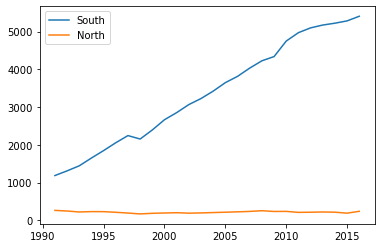

In [6]:
tdf_ns = df_ns.T
print(tdf_ns.head())
print('\n')
tdf_ns.plot()

## 2. 막대 그래프

     South North
1991  1186   263
1992  1310   247
1993  1444   221
1994  1650   231
1995  1847   230




<AxesSubplot:>

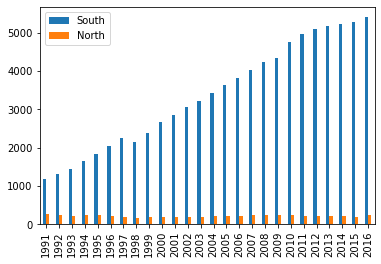

In [7]:
# 행, 열 전치하여 막대 그래프 그리기
tdf_ns = df_ns.T
print(tdf_ns.head())
print('\n')
tdf_ns.plot(kind='bar')

## 3. 산점도

<AxesSubplot:xlabel='weight', ylabel='mpg'>

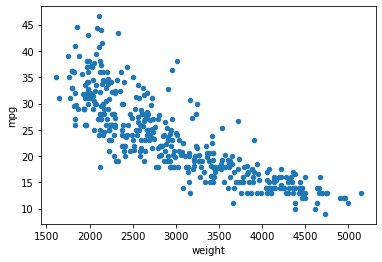

In [8]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Owner\\Desktop\\khh\\SeoulICT\\220212\\auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'hosrsepower', 'weight',
             'acceleration', 'model year', 'origin','name']

# 2개의 열을 선택하여 산점도 그리기
df.plot(x='weight', y='mpg', kind='scatter')

## 4. 박스플롯

<AxesSubplot:>

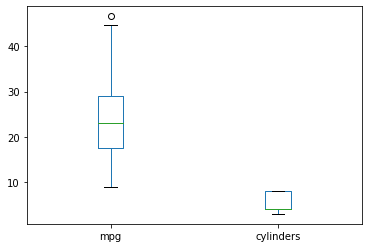

In [9]:
# 열을 선택하여 박스 플롯 그리기
df[['mpg', 'cylinders']].plot(kind='box')

# Seaborn라이브러리 - 고급 그래프 도구
## 1. 데이터셋 가져오기

In [10]:
import seaborn as sns

# titanic 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# titanic 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

## 2. 회귀선이 있는 산점도

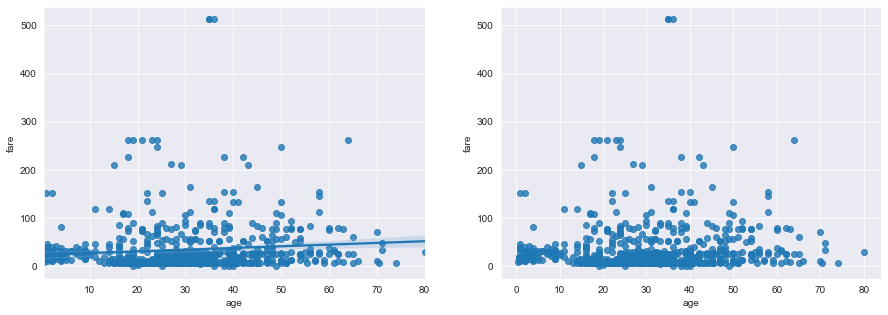

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지 darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')
#그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15, 5))    # 그래프 객체 전체의 사이즈
ax1 = fig.add_subplot(1, 2, 1)    # 그래프 객채 1행 2열 중 1열
ax2 = fig.add_subplot(1, 2, 2)    # 1g행 2열 중 2열

# 그래프 그리기 - 선형회귀선 표시(fit_reg=True 디폴트값)
sns.regplot(x='age',           # x축 변수
            y = 'fare',        # y축 변수
            data = titanic,    # 데이터
            ax = ax1)          # axe 객체 - 1번째 그래프

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',            # x축 변수
            y = 'fare',         # y축 변수
            data = titanic,     # 데이터
            ax = ax2,           # axe 객체 - 1번째 그래프
            fit_reg = False)    # 회귀선 미표시

plt.show()

## 3. 히스토그램/커널 밀도 그래프

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


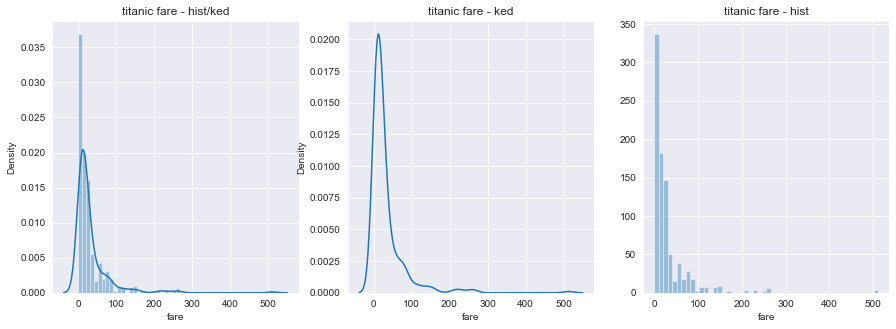

In [14]:
# 아래 코드 쓰면 warning 사라진다는데 그래도 뭔가 이유가 있어서 나오는것 같고
# 정상적으로 수행도 되니 그냥 하도록 하겠다
# import warnings
# warning.filterwarnings('ignore')


# 그래프 객체 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값
sns.distplot(titanic['fare'], ax=ax1)

# hist=False
sns.distplot(titanic['fare'], hist=False, ax=ax2)

# kde=False
sns.distplot(titanic['fare'], kde=False, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

## 4. 히트맵

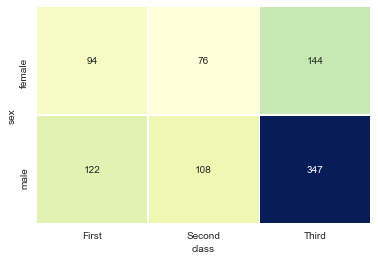

In [16]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table,                # 데이터 프레임
           annot=True, fmt='d',   # 데이터 값(사각형 안에 숫자) 표시 여부, 정수형 포맷
           cmap='YlGnBu',         # 컬러 맵
           linewidth=.5,          # 구분 선
           cbar=False)            # 컬러 바 표시

plt.show()

## 5. 범주형 데이터의 산점도

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


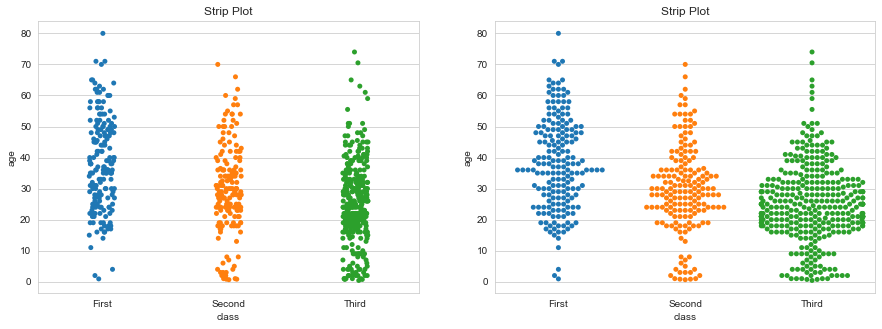

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

# 스타일 테마 설정(5가지 darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

#그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15, 5))    # 그래프 객체 전체의 사이즈
ax1 = fig.add_subplot(1, 2, 1)    # 그래프 객채 1행 2열 중 1열
ax2 = fig.add_subplot(1, 2, 2)    # 1g행 2열 중 2열

# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x='class',    # x축 변수
             y = 'age',    # y축 변수
             data = titanic,    # 데이터셋 - 데이터 프레임
             ax = ax1)    # axe 객체 - 1번째 그래프

# 이산형 변수의 분포 - 데이터 분산 고려(중복 X)
sns.swarmplot(x='class',
              y = 'age',
              data = titanic,
              ax = ax2)

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

## 6. 막대그래프

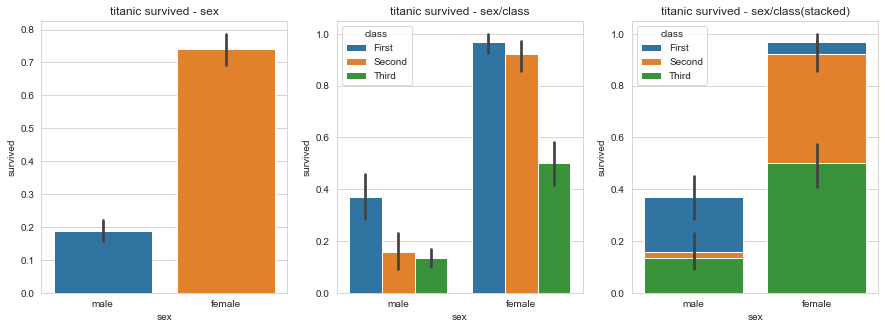

In [21]:
# 그래프 객세 생성(figure에 3개의 서브 플롯 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)

# x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

## 7. 박스 플롯. 바이올린 그래프

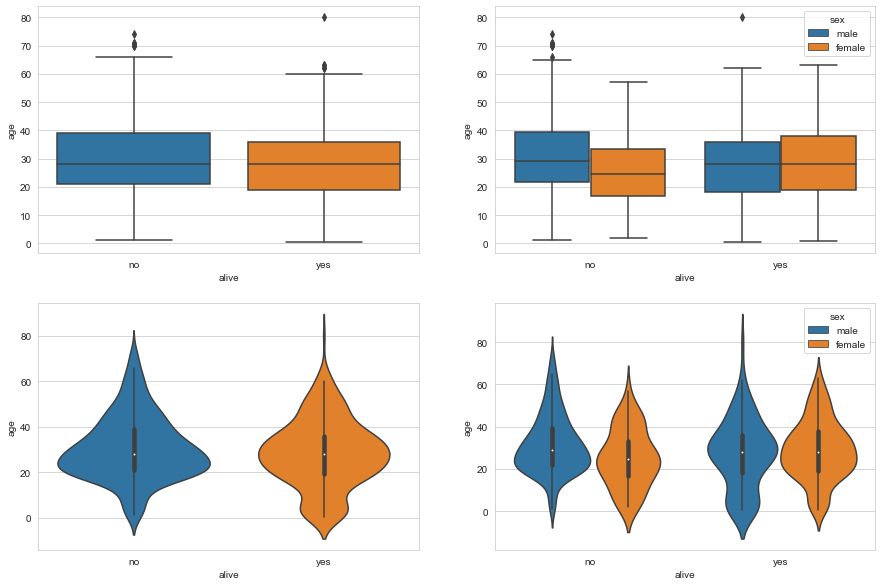

In [23]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 박스 플롯 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)

# 박스 플롯 - 기본ㄱ밧
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

https://seaborn.pydata.org/api.html
위의 그래프 확인할 수 있는 사이트

# Folium라이브러리 - 지도 활용
## 1. 지도 만들기

In [24]:
conda install -c conda-forge folium

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Owner\anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    conda-4.11.0               |   py38haa244fe_0        16.9 MB  conda-forge
    folium-0.12.1.post1        |     pyhd8ed1ab_1          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        17.0 MB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.4.2-pyhd8ed1ab_0
  folium             conda-forge/noarch::folium-0.12.1.post1-pyhd8ed1ab_1
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [27]:
import folium

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12)

# 지도를 HTML 파일로 저장하기
seoul_map.save('C:\\Users\\Owner\\Desktop\\khh\\SeoulICT\\220213\\seoul.html')

seoul_map

## 2. 지도 스타일 적용하기

In [29]:
import folium

# 서울 지도 만들기
seoul_map2 = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)    # Stamen Terrain : 산악지형 위주 표시
seoul_map3 = folium.Map(location=[37.55, 126.98], tiles='Stamen Toner', zoom_start=15)    # Stamen Toner : 흑백으로 도로 위주 표시

# 지도를 HTML 파일로 저장하기
seoul_map2.save('C:\\Users\\Owner\\Desktop\\khh\\SeoulICT\\220213\\seoul2.html')
seoul_map3.save('C:\\Users\\Owner\\Desktop\\khh\\SeoulICT\\220213\\seoul3.html')

In [30]:
seoul_map2

In [31]:
seoul_map3

## 3. 지도에 마커 표시하기

In [46]:
import pandas as pd
import folium

# 대학교 리스트를 데이터프레임으로 변환
df = pd.read_excel('C:\\Users\\Owner\\Desktop\\khh\\SeoulICT\\220212\\서울지역 대학교 위치.xlsx')

# 서울 지도 만들기
seoul_map4 = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

# 대학교 위치 정보를 Marker로 표시
for name, lat, lng in zip(df.대학교, df.위도, df.경도):
    # 아래 두 코드는 대학교 이름이 나오는 말풍선 사이즈 지정
    iframe = folium.IFrame(name, width=200, height=80) # 프레임 사이즈 지정
    popup = folium.Popup(iframe, max_width = 300)
    
    folium.Marker([lat, lng], popup=popup).add_to(seoul_map4)
    #folium.Marker([lat, lng], popup=name).add_to(seoul_map4)    # 이렇게 쓰면 대학교 이름이 세로로 나온다
    
# 지도를 HTML 파일로 저장하기
seoul_map4.save('C:\\Users\\Owner\\Desktop\\khh\\SeoulICT\\220213\\seoul_colleges.html')

seoul_map4

## 4. 지도 스타일 적용하기

In [53]:
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=10,         # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7, # 투명도
                        popup=name).add_to(seoul_map)
    
# 지도를 HTML 파일로 저장하기
seoul_map.save('C:\\Users\\Owner\\Desktop\\khh\\SeoulICT\\220213\\seoul_colleges2.html')

seoul_map

https://www.youtube.com/watch?v=JwSS70SZdyM&t=2076s

# 텍스트 분석으로 할 수 있는 것